<a href="https://colab.research.google.com/github/riyamishra28/Early-Type-2-Diabetes-Prediction/blob/main/Shap_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving DiabetesPredict_Dataset.csv to DiabetesPredict_Dataset.csv


In [ ]:
import numpy as np
import pandas as pd

from IPython.core.display import display, HTML
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio


import seaborn as sns
from importlib import reload
import matplotlib.pyplot as plt
import matplotlib
import warnings

df = pd.read_csv("DiabetesPredict_Dataset.csv")  # Replace with your actual filename if different

In [ ]:
# Basic overview of dataset
df.info()
display(df.head(10))
display(df.describe(include='all'))

# Check for null values
print("\nMissing values:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 2029 entries, 0 to 9998
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         2029 non-null   float64
 1   No_Pation  2029 non-null   float64
 2   Gender     2029 non-null   object 
 3   AGE        2029 non-null   float64
 4   Urea       2029 non-null   float64
 5   Cr         2029 non-null   float64
 6   HbA1c      2029 non-null   float64
 7   Chol       2029 non-null   float64
 8   TG         2029 non-null   float64
 9   HDL        2029 non-null   float64
 10  LDL        2029 non-null   float64
 11  VLDL       2029 non-null   float64
 12  BMI        2029 non-null   float64
 13  CLASS      2029 non-null   object 
dtypes: float64(12), object(2)
memory usage: 237.8+ KB


,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502.0,17975.0,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735.0,34221.0,M,26.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420.0,47975.0,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680.0,87656.0,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504.0,34223.0,M,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
5,634.0,34224.0,F,45.0,2.3,24.0,4.0,2.9,1.0,1.0,1.5,0.4,21.0,N
6,721.0,34225.0,F,50.0,2.0,50.0,4.0,3.6,1.3,0.9,2.1,0.6,24.0,N
7,421.0,34227.0,M,48.0,4.7,47.0,4.0,2.9,0.8,0.9,1.6,0.4,24.0,N
8,670.0,34229.0,M,43.0,2.6,67.0,4.0,3.8,0.9,2.4,3.7,1.0,21.0,N
9,759.0,34230.0,F,32.0,3.6,28.0,4.0,3.8,2.0,2.4,3.8,1.0,24.0,N


,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
count,2029.000000,2.029000e+03,2029,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029
unique,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y
freq,NaN,NaN,1143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1713
mean,339.275033,1.892878e+05,NaN,53.404853,5.177200,69.130270,8.330454,4.896585,2.338781,1.203721,2.642292,1.865085,29.808934,NaN
std,241.410974,2.408134e+06,NaN,9.028062,3.053940,61.512034,2.583695,1.482915,1.379722,0.658484,1.120517,3.807292,5.954796,NaN
min,0.932728,1.230000e+02,NaN,20.000000,0.334697,6.000000,0.891217,0.000000,0.238050,0.200000,0.300000,-0.382041,18.604046,NaN
25%,120.000000,2.404704e+04,NaN,50.878734,3.700000,48.000000,6.590211,4.014357,1.468271,0.900000,1.800000,0.687549,26.000000,NaN
50%,302.930404,3.438900e+04,NaN,55.000000,4.619244,60.054134,8.029839,4.765868,2.000000,1.097186,2.513452,0.932399,29.987892,NaN
75%,549.070239,4.538603e+04,NaN,59.000000,5.743244,73.806448,10.100000,5.600000,2.900000,1.300000,3.399596,1.476420,33.000000,NaN



Missing values:
 ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Drop rows with missing values
df.dropna(inplace=True)

# Separate features and target
X = df.drop(columns=["ID", "No_Pation", "CLASS"], errors='ignore')
y = df["CLASS"]

# Encode any categorical features
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Scale numeric features
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_train = pd.DataFrame(X_train, columns=X.columns)

# Train a Random Forest for SHAP analysis
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

<Figure size 640x480 with 0 Axes>

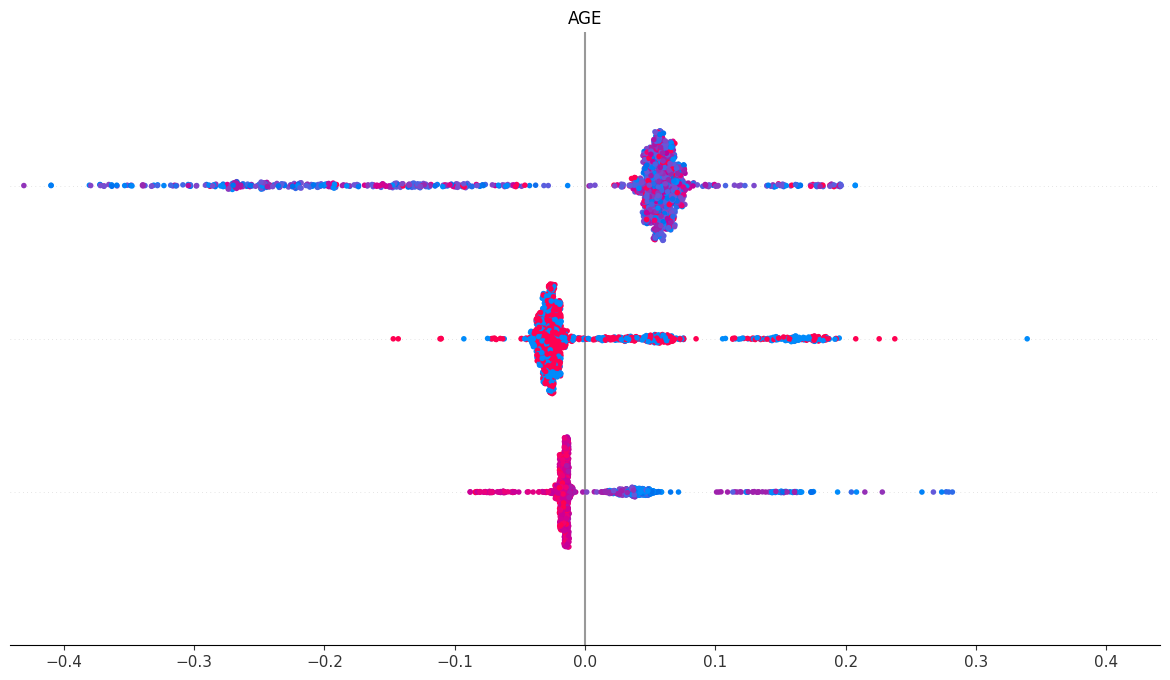

In [ ]:
import shap

# Create SHAP explainer and compute SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# Summary plot
shap.summary_plot(shap_values, features=X_train, feature_names=X.columns)